In [5]:
library("data.table")
library("qtl")

In [9]:
datf2 <- read.cross(format = "csvs",
                    genotypes = c(-1,0,1,"C","D"),
                    dir = "./",
                    genfile="geno_out_all_20190821.csv",
                    phefile = "pheno_out_all_20190821.csv" )

 --Read the following data:
	 3055  individuals
	 1013  markers
	 3  phenotypes
 --Cross type: f2 


In [3]:
summary(datf2)

    F2 intercross

    No. individuals:    2275 

    No. phenotypes:     4 
    Percent phenotyped: 100 97.5 25.2 25.2 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  60.9 
    Genotypes (%):      AA:25.7  AB:48.1  BB:26.2  not BB:0.0  not AA:0.0 

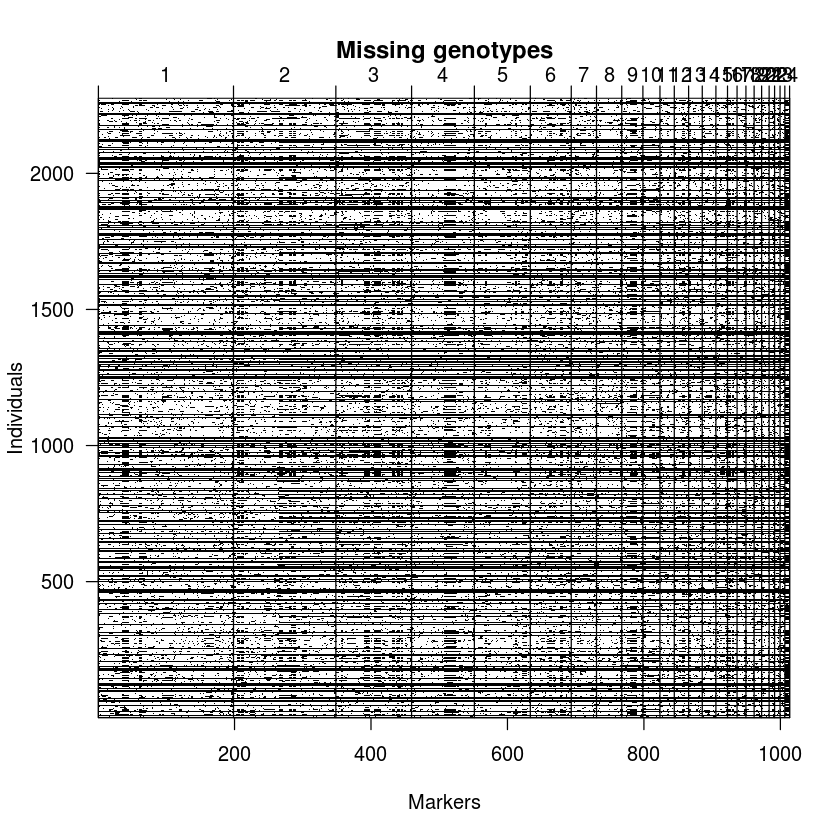

In [4]:
plotMissing(datf2)

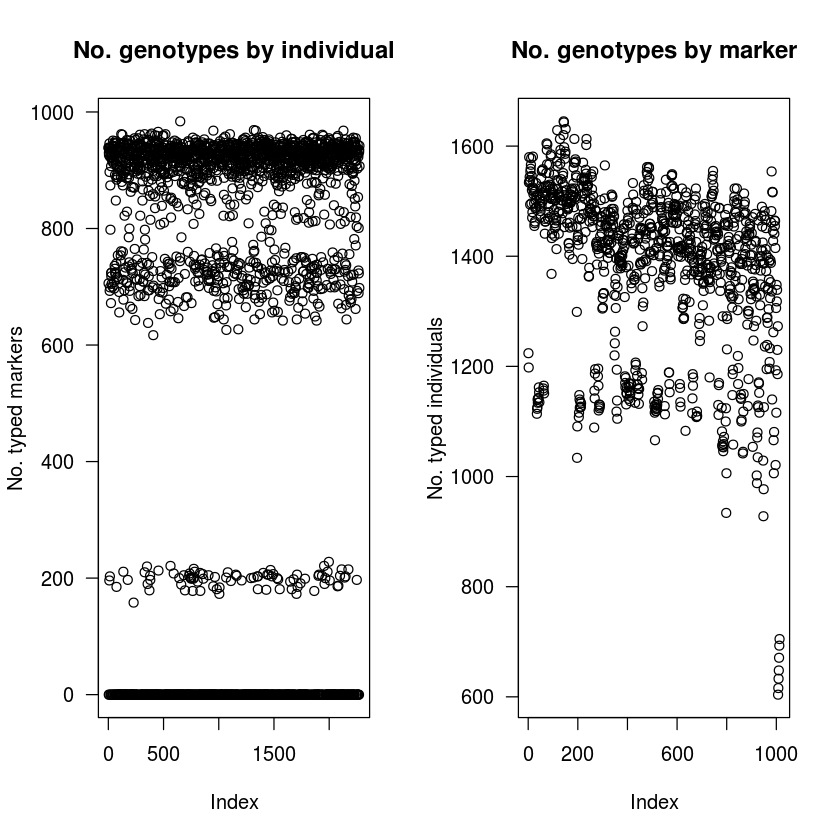

In [5]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2), ylab="No. typed markers", main="No. genotypes by individual")
plot(ntyped(datf2, "mar"), ylab="No. typed individuals", main="No. genotypes by marker")

In [8]:
nt.bymar <- ntyped(datf2, "mar")
todrop <- names(nt.bymar[nt.bymar < 500])


In [7]:
todrop

character(0)

In [9]:
datf2.1 <- drop.markers(datf2, todrop)

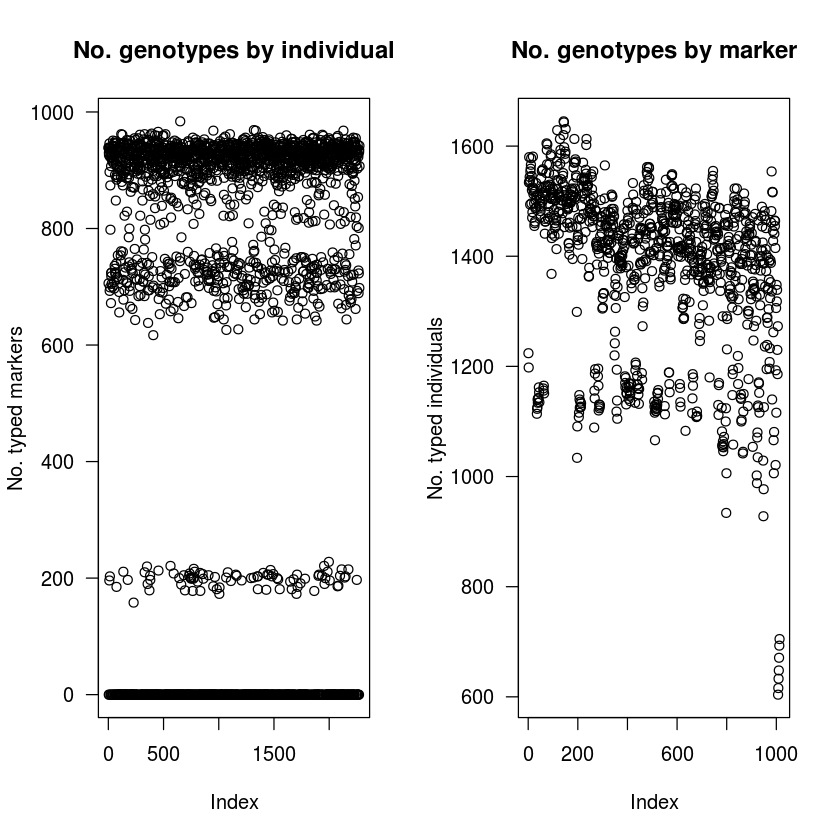

In [10]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.1), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.1, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [18]:
datf2.2 <- subset(datf2.1, ind=(ntyped(datf2.1)>200)) # removing all individuals that have less than 25% of all markers


In [19]:
length(ntyped(datf2.1, "ind"))
length(ntyped(datf2.2, "ind"))

[1] 2275

[1] 1633

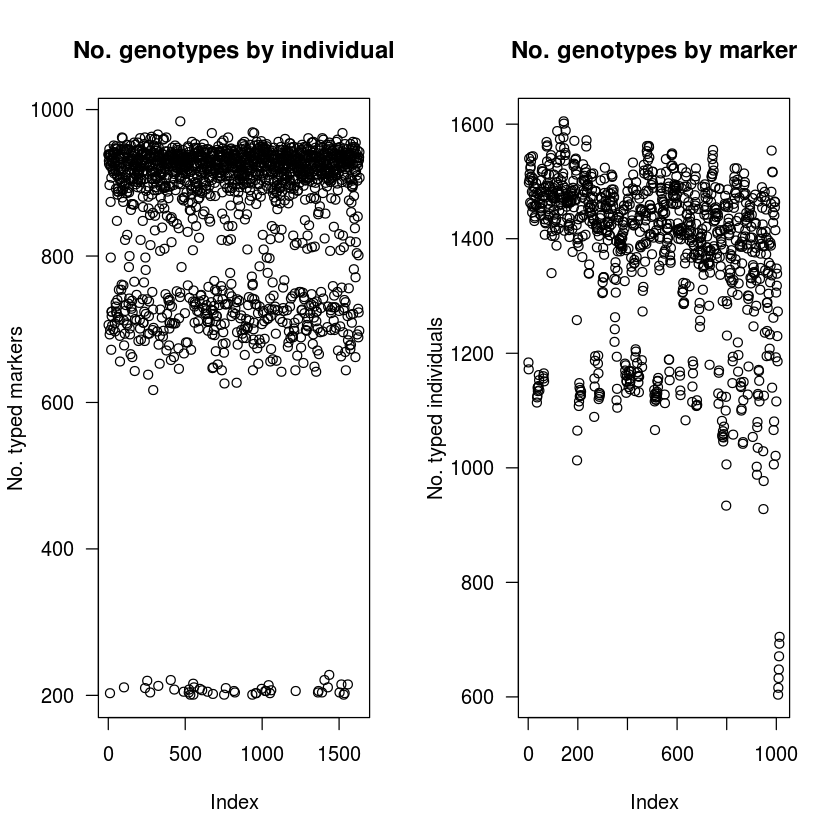

In [20]:
par(mfrow=c(1,2), las=1)
plot(ntyped(datf2.2), ylab="No. typed markers", main="No. genotypes by individual") 
plot(ntyped(datf2.2, "mar"), ylab="No. typed individuals",main="No. genotypes by marker")

In [21]:
summary(datf2.2)

    F2 intercross

    No. individuals:    1633 

    No. phenotypes:     4 
    Percent phenotyped: 100 96.5 22 22 

    No. chromosomes:    24 
        Autosomes:      1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 
                        23 24 

    Total markers:      1013 
    No. markers:        198 150 111 92 82 60 37 37 31 25 21 21 20 20 17 14 13 12 
                        11 11 8 8 7 7 
    Percent genotyped:  84.4 
    Genotypes (%):      AA:25.6  AB:48.1  BB:26.2  not BB:0.0  not AA:0.0 

In [22]:
cg <- comparegeno(datf2.2)

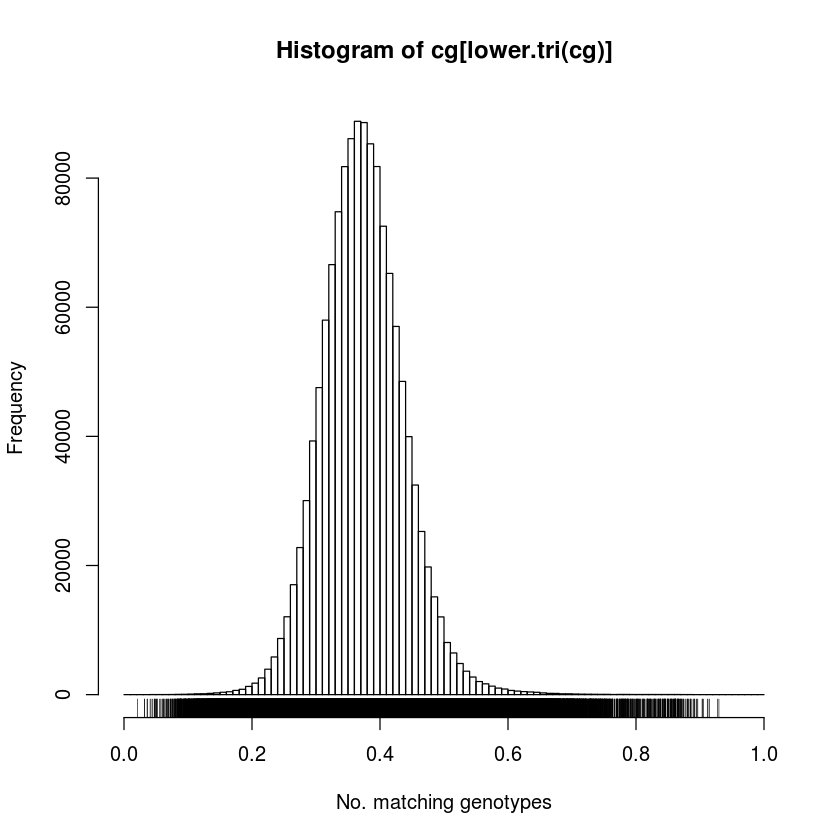

In [23]:
hist(cg[lower.tri(cg)], breaks=seq(0, 1, len=101), xlab="No. matching genotypes") 
rug(cg[lower.tri(cg)])

In [24]:
wh <- which(cg > 0.9, arr=TRUE)
wh <- wh[wh[,1] < wh[,2],]

In [25]:
wh

row,col
93,322
415,459
20,579
376,579
20,734
191,1436
210,1436
764,1436


In [26]:
print(dup <- findDupMarkers(datf2.2, exact.only=FALSE))

$`8-15`
[1] "8-16"

$`13-4`
[1] "13-3"



In [27]:
gt <- geno.table(datf2.2)

In [28]:
gt[gt$P.value < 0.05/totmar(datf2.2),]
todrop <- rownames(gt[gt$P.value < 0.05/totmar(datf2.2),])
datf2.3 <- drop.markers(datf2.2, todrop)

,chr,missing,AA,AB,BB,not.BB,not.AA,P.value
1-24,1,177,436,718,302,0,0,3.840991e-06
1-80,1,200,415,724,294,0,0,3.378364e-05
1-83,1,181,447,708,297,0,0,1.192375e-07
1-84,1,121,492,718,302,0,0,6.330042e-12
1-85,1,104,499,722,308,0,0,4.091782e-12
1-86,1,141,478,716,298,0,0,1.109156e-10
1-87,1,190,441,713,289,0,0,1.006893e-07
1-88,1,143,453,747,290,0,0,1.792781e-08
1-89,1,156,436,747,294,0,0,1.067885e-06
1-90,1,151,420,765,297,0,0,1.694005e-05


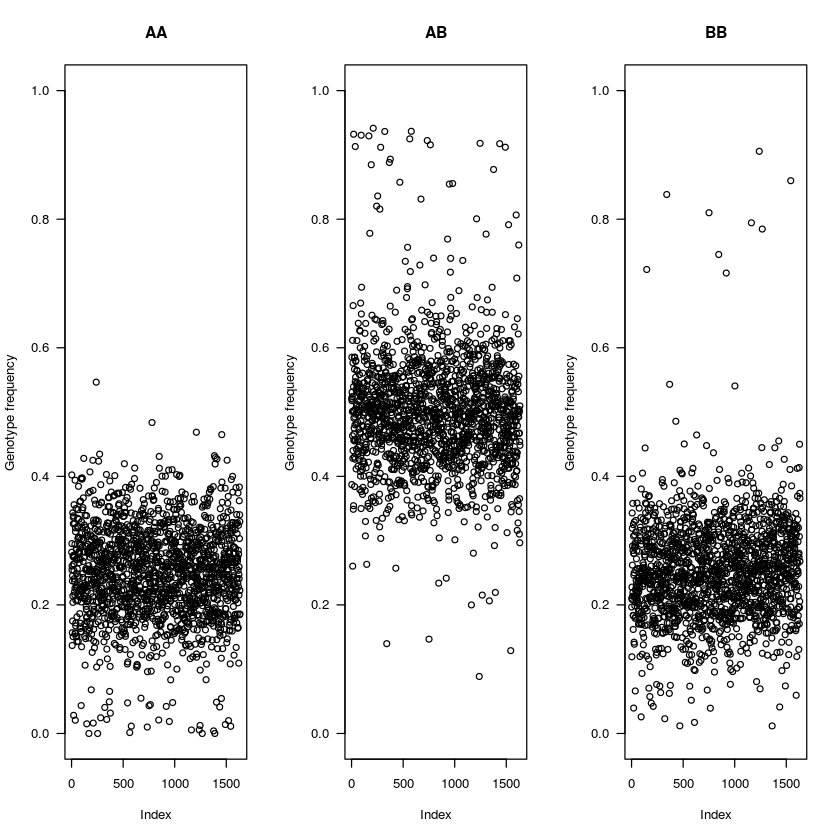

In [29]:
g <- pull.geno(datf2.3)
gfreq <- apply(g, 1, function(a) table(factor(a, levels=1:3)))
gfreq <- t(t(gfreq) / colSums(gfreq))
par(mfrow=c(1,3), las=1)
for(i in 1:3) plot(gfreq[i,], ylab="Genotype frequency", main=c("AA", "AB", "BB")[i], ylim=c(0,1))

In [30]:
id_gtfreq <- which(gfreq[1,]<0.5 & gfreq[2,]<0.65 & gfreq[2,]>0.35 & gfreq[3,]<0.5)

In [31]:
datf2.4 <- subset(datf2.3, ind=(id_gtfreq))

In [32]:
datf2.4 <- est.rf(datf2.4)
datf2.4_tst <- markerlrt(datf2.4)

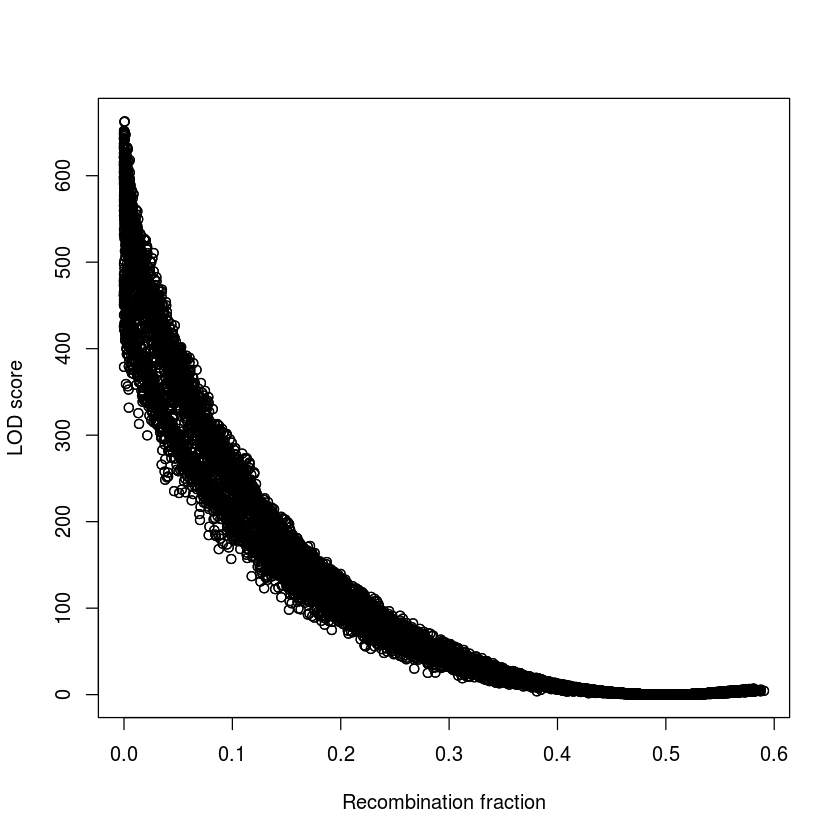

In [33]:
rf <- pull.rf(datf2.4)
lod <- pull.rf(datf2.4, what="lod")
plot(as.numeric(rf), as.numeric(lod), xlab="Recombination fraction", ylab="LOD score")

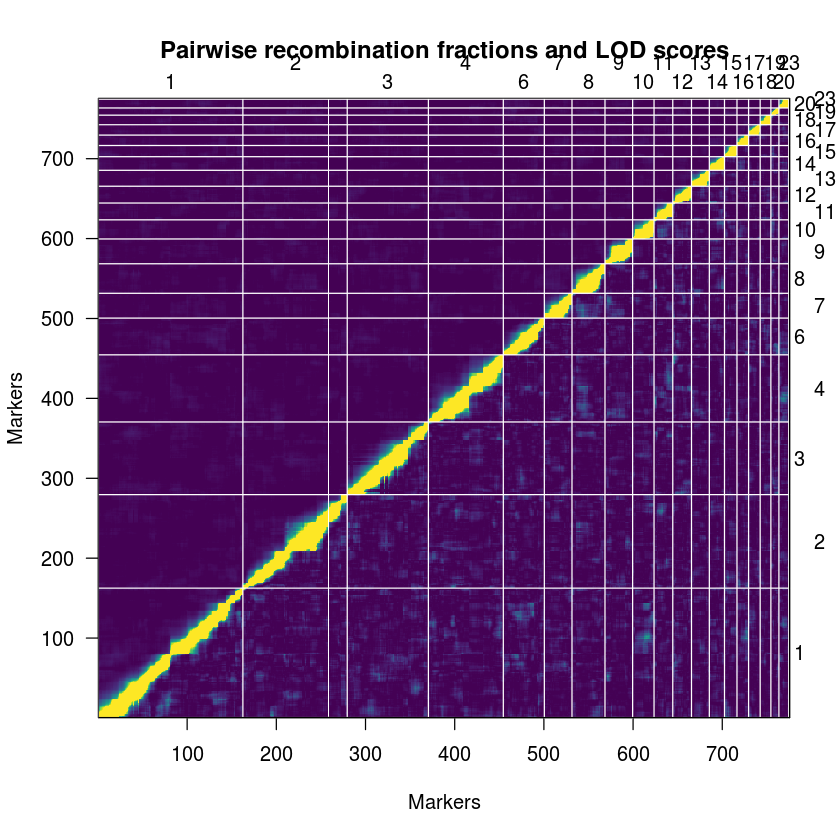

In [34]:
plotRF(datf2.4, alternate.chrid=TRUE)

In [46]:
genmap <- est.map(datf2.4, error.prob=0.005)

In [47]:
summaryMap(genmap)

,n.mar,length,ave.spacing,max.spacing
1,162,613.51270,3.810638,58.768933
2,117,409.36384,3.528999,37.343591
3,91,281.47584,3.127509,48.171227
4,84,263.27711,3.172013,28.216057
6,46,165.04850,3.667745,25.381363
7,31,91.88451,3.062817,9.389278
8,37,98.40594,2.733498,11.059845
9,31,76.82356,2.560785,11.609330
10,24,62.59441,2.721496,15.151972
11,21,74.99277,3.749638,29.370181


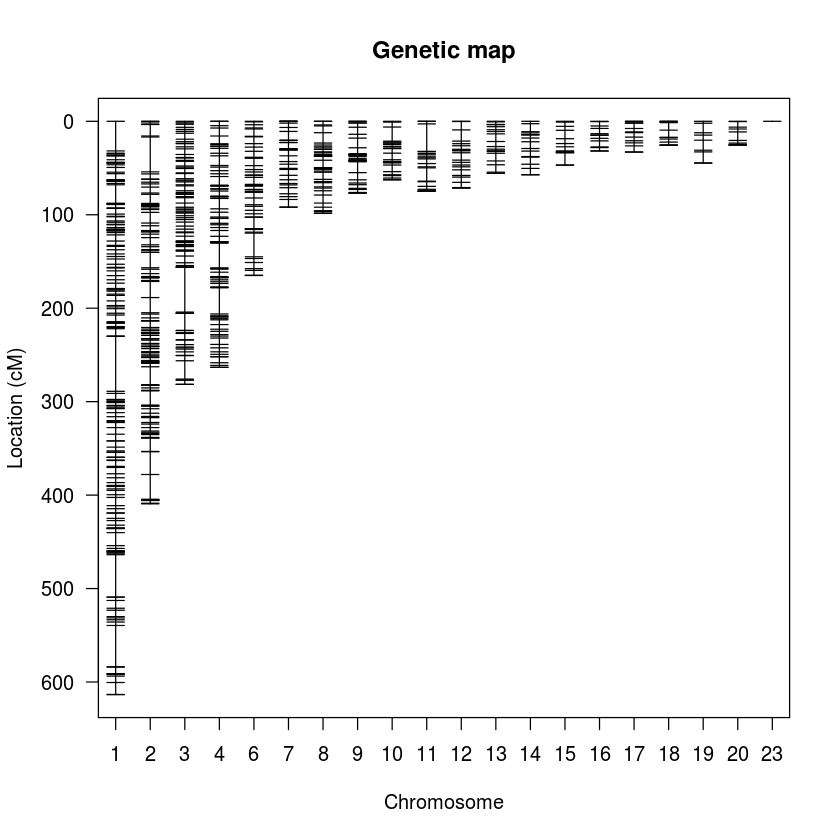

In [48]:
plotMap(genmap)

In [49]:
datf2.4 <- replace.map(datf2.4, genmap)

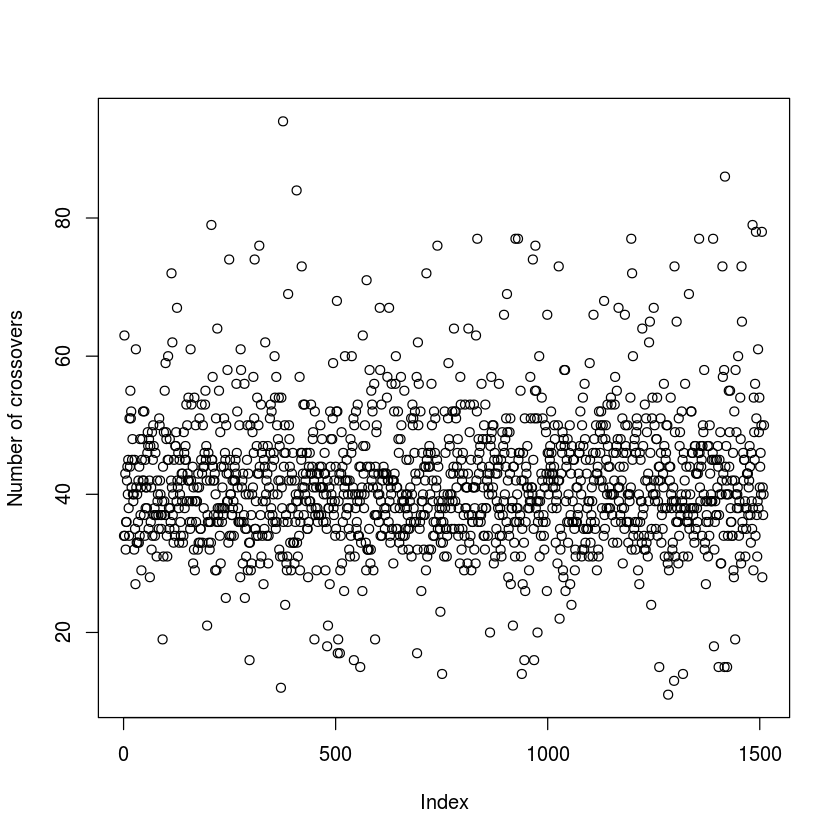

[1] 41.78212

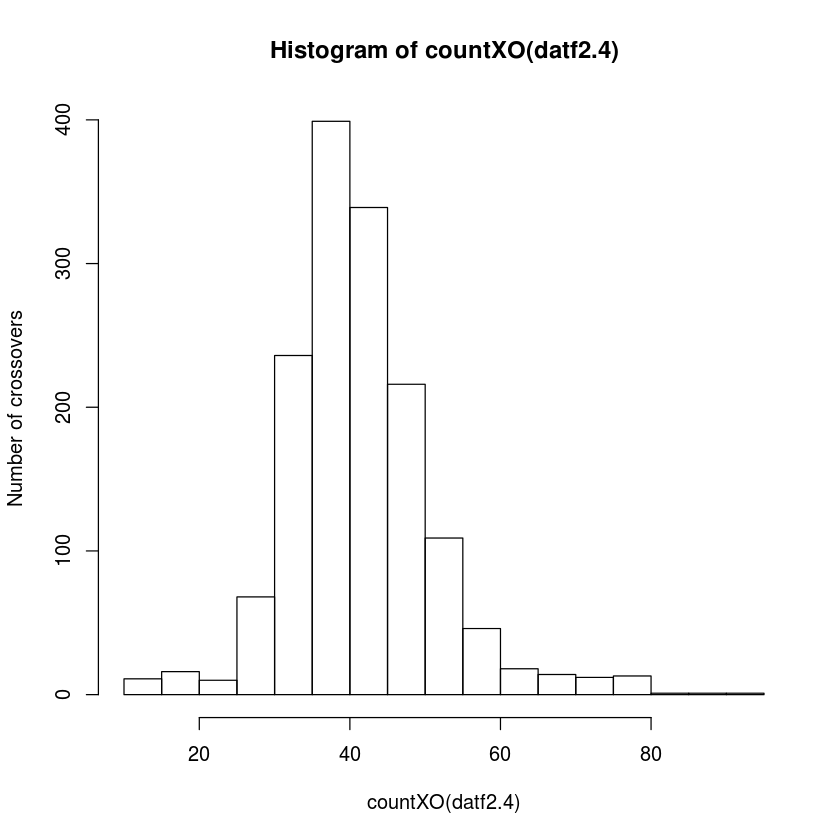

In [35]:
plot(countXO(datf2.4), ylab="Number of crossovers")
hist(countXO(datf2.4), ylab="Number of crossovers")
mean(countXO(datf2.4), ylab="Number of crossovers")


In [36]:
datf2.5 <- datf2.4

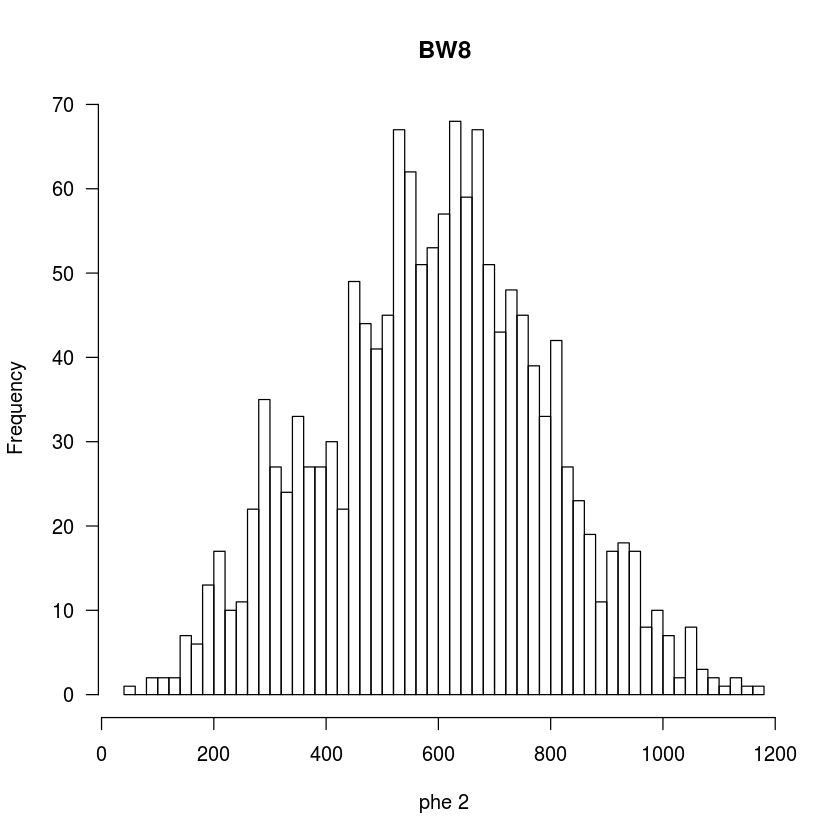

In [37]:
plotPheno(datf2.5, pheno.col=2)

In [39]:
#plotMissing(datf2.5, reorder=TRUE)

In [40]:
datf2.5 <- calc.genoprob(datf2.5, step=1)

In [41]:
datf2.5 <- calc.genoprob(datf2.5, step=0, off.end = 0)


In [42]:
out.em <- scanone(datf2.5, pheno.col = 2)

Warning message in checkcovar(cross, pheno.col, addcovar, intcovar, perm.strata, :
"Dropping 51 individuals with missing phenotypes.
"

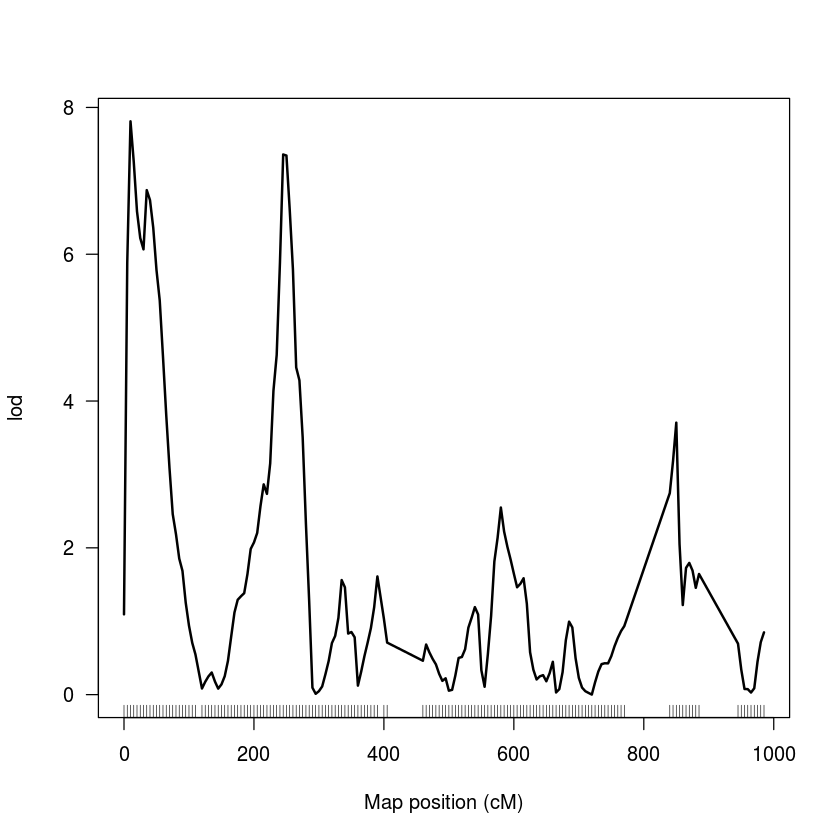

In [43]:
plot(out.em, chr=1)

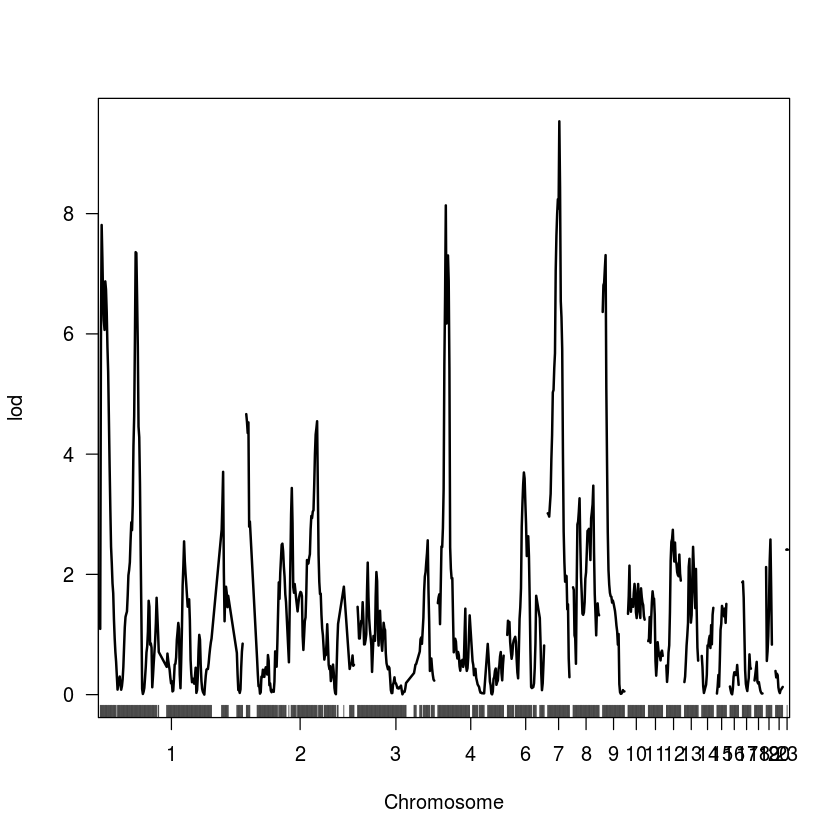

In [44]:
plot(out.em)

In [10]:
ac <- pull.pheno(datf2.5, c("Sex"))

ERROR: Error in pull.pheno(datf2.5, c("Sex")): object 'datf2.5' not found


ERROR: Error in eval(expr, envir, enclos): object 'out.em' not found
